# A1

Using a time series model, is there a seasonal trend of when revenue increases and decreases? A decrease in revenue could possibly indicate customer churn and from there analayze if there is a seasonal trend indicating if there is a pattern in customer churning. 

# A2

The goal is to build a time series model where we can predict future revenue predictions, observe seasonality trends and patterns. A decrease in revenue can indicate customer churn.

# B

-Data does not contain anomalies
-Model parameters and error term is constant
-Historic timepoints dictate behavior of present timepoints which might not hold in stressed market data conditions 
-Time series is stationary

# C1

In [1]:
# import a couple of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# import data
df = pd.read_csv("teleco_time_series .csv", index_col='Day', parse_dates=True)
# look at the head
df.head(10)

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554
6,0.107654
7,0.493901
8,0.376698
9,0.304075


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [3]:
df.duplicated()

Day
1      False
2      False
3      False
4      False
5      False
       ...  
727    False
728    False
729    False
730    False
731    False
Length: 731, dtype: bool

In [4]:
df.isnull().any()

Revenue    False
dtype: bool

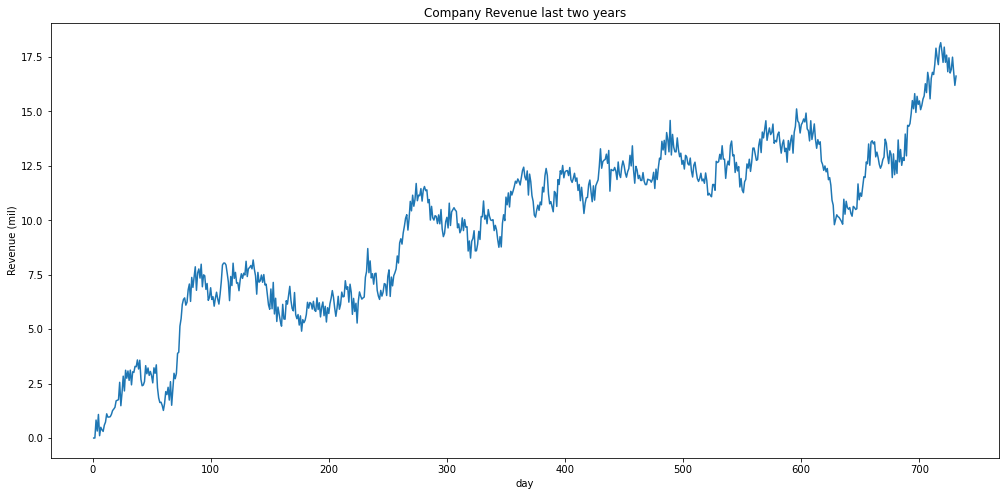

In [5]:
plt.figure(figsize=(17, 8))
plt.plot(df.Revenue)
plt.title('Company Revenue last two years')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(df):
    
    #Determing rolling statistics
    rolmean = pd.rolling.mean(df, window=12)
    rolstd = pd.rolling.std(df, window=12)
#Plot rolling statistics:
    plt.plot(df, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
        #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df)

moving_avg = pd.rolling(12).mean(df.Revenue)
plt.plot(df.Revenue)
plt.plot(moving_avg, color='red')

# C2

The time step format of this dataset is measured in days, it can be seen that the data type for day is in integers. It also shows that there are no gaps in the dataset. The length of the sequence is 731 data points. Also the dataset shows that there are no duplicates.

# C3

As seen on the 'Company Revenue last two years' plot, the can be see that it is non-stationary as the plot has an upward trend.

# C4

#1) understand the dataframe using the .info() function
#2) convert time column into datetime format if column is stored as string
#3) check for trend, seasonality, and noise
#4) test for stationarity using dickey fuller test. Make the data stationary
#5) split data in train and test set training, early data will be used for training, later data will be used for testing
#6) 

# C5

In [6]:
# train and split the dataset
df_train = df.loc[:'531']
df_test = df.loc['532':]

In [7]:
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [8]:
df

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554
...,...
727,16.931559
728,17.490666
729,16.803638


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 31.4 KB


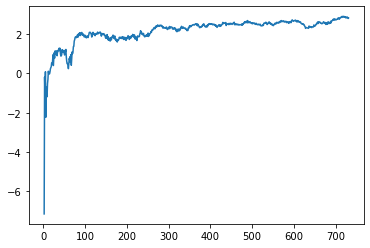

In [10]:
lndf = np.log(df)
lndf
plt.plot(lndf)
plt.show()

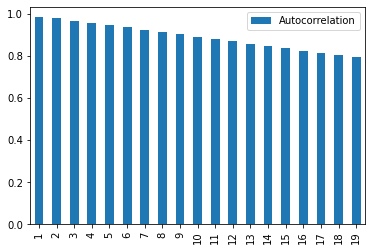

In [11]:
acf_1 = acf(df)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

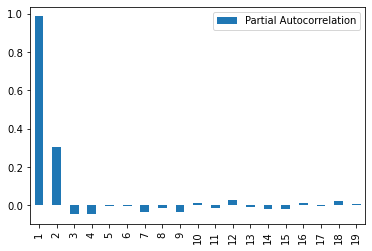

In [12]:
pacf_1 = pacf(df)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

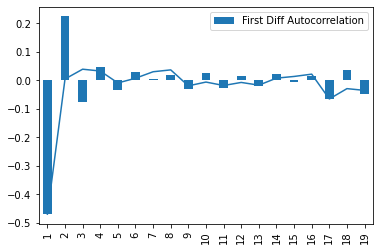

In [13]:
result = ts.adfuller(df, 1)
result
df_diff = df-df.shift()
diff=df_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Diff Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

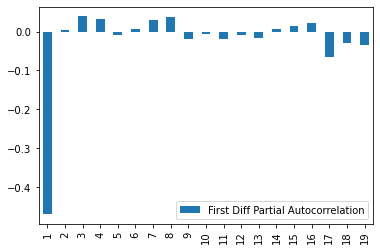

In [14]:
test_df = pd.DataFrame([pacf_1_diff]).T
test_df.columns = ['First Diff Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

revenue_matrix = df.as_matrix(columns=None)
model = ARIMA(df_matrix, order=(0,1,0))
model.fit = model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(122, 127, typ='levels')
predictions
predictionsadjusted= np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Revenue')

In [15]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

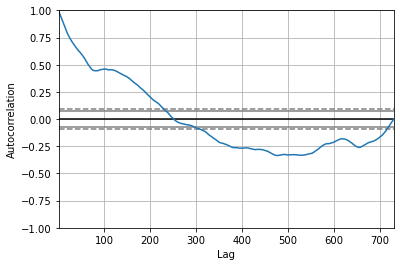

In [16]:
autocorrelation_plot(df)

In [17]:
mod = ARMA(df, order=(1,0))
result = mod.fit()

In [18]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                Revenue   No. Observations:                  731
Model:                     ARMA(1, 0)   Log Likelihood                -582.529
Method:                       css-mle   S.D. of innovations              0.535
Date:                Mon, 30 May 2022   AIC                           1171.059
Time:                        14:52:48   BIC                           1184.842
Sample:                             0   HQIC                          1176.376
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3253      2.933      3.179      0.001       3.576      15.075
ar.L1.Revenue     0.9945      0.004    230.564      0.000       0.986       1.003
                                    Root

In [19]:
print(result.params)

const            9.325328
ar.L1.Revenue    0.994450
dtype: float64


res=mod.fit()
res.plot_predict(start='1', end='800')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
results = adfuller(df)
print(results)
# p-value is greater than 0.05 so we accept the null-hypothesis and it is non-stationary

(-1.9246121573101798, 0.32057281507939817, 1, 729, {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, 965.0609576707513)


In [22]:
#taking the difference to make it more stationary

df_stationary = df.diff().dropna()
df_stationary

,Revenue
Day,
2,0.000793
3,0.824749
4,-0.505210
5,0.762222
6,-0.974900
...,...
727,0.170280
728,0.559108
729,-0.687028


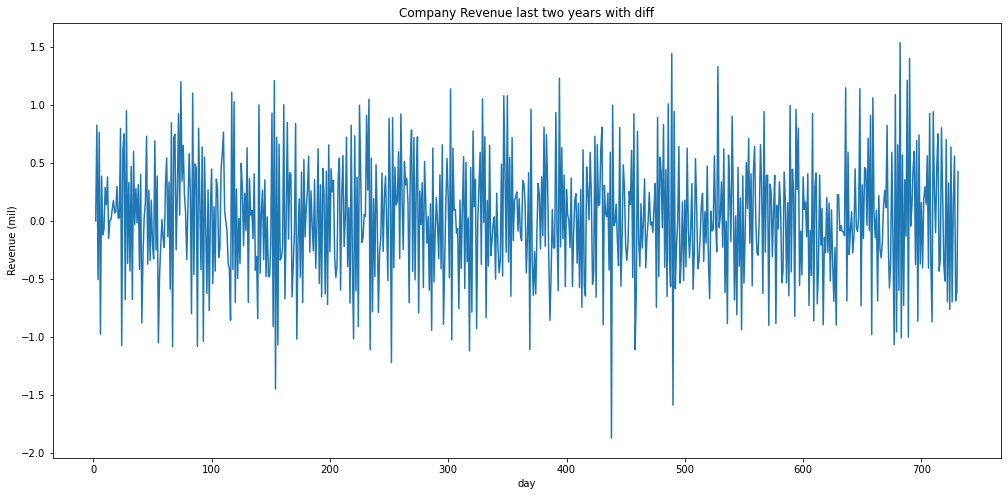

In [23]:
plt.figure(figsize=(17, 8))
plt.plot(df_stationary)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [24]:
model_1 = ARMA(df_stationary, order=(1,0))
results_2=model_1.fit()

In [25]:
print(results_2.summary())

                              ARMA Model Results                              
Dep. Variable:                Revenue   No. Observations:                  730
Model:                     ARMA(1, 0)   Log Likelihood                -488.561
Method:                       css-mle   S.D. of innovations              0.472
Date:                Mon, 30 May 2022   AIC                            983.122
Time:                        14:52:48   BIC                            996.901
Sample:                             0   HQIC                           988.438
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0226      0.012      1.898      0.058      -0.001       0.046
ar.L1.Revenue    -0.4692      0.033    -14.370      0.000      -0.533      -0.405
                                    Root

In [26]:
print(results_2.params)

const            0.022601
ar.L1.Revenue   -0.469230
dtype: float64


In [27]:
results_2 = adfuller(df_stationary)
print(results_2)
# test statistic (-44.87) indicates that it is more likely to be stationary being more negative
# p-value (0.0) being smaller than 0.05 indicates to reject the null hypothesis reject non-stationary

(-44.874527193875984, 0.0, 0, 729, {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, 965.5032159185916)


In [28]:
#copy of cleaned dataset
df_stationary.to_csv('df_prepared_PA1.csv')

# D1

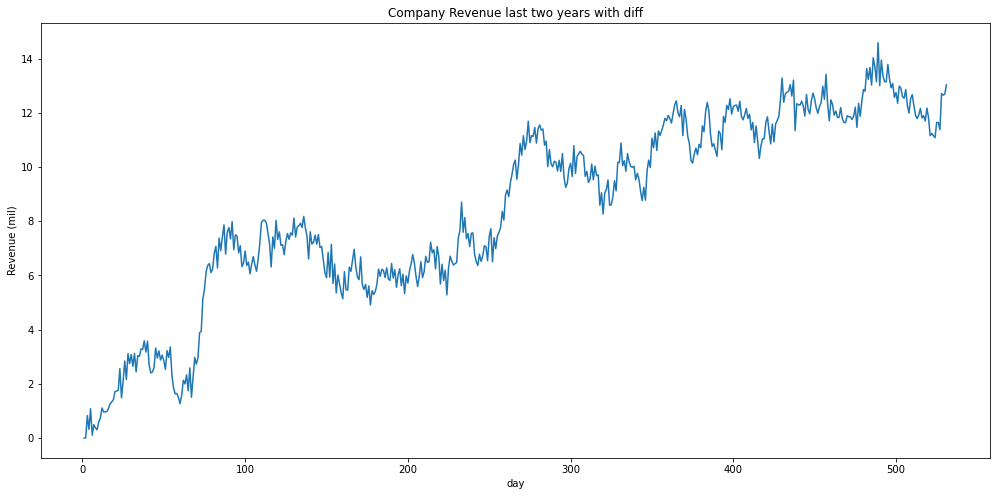

In [29]:
plt.figure(figsize=(17, 8))
plt.plot(df_train)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [30]:
df_trainstat = df_train.diff().dropna()
df_trainstat

,Revenue
Day,
2,0.000793
3,0.824749
4,-0.505210
5,0.762222
6,-0.974900
...,...
527,-0.265185
528,1.328921
529,-0.055184


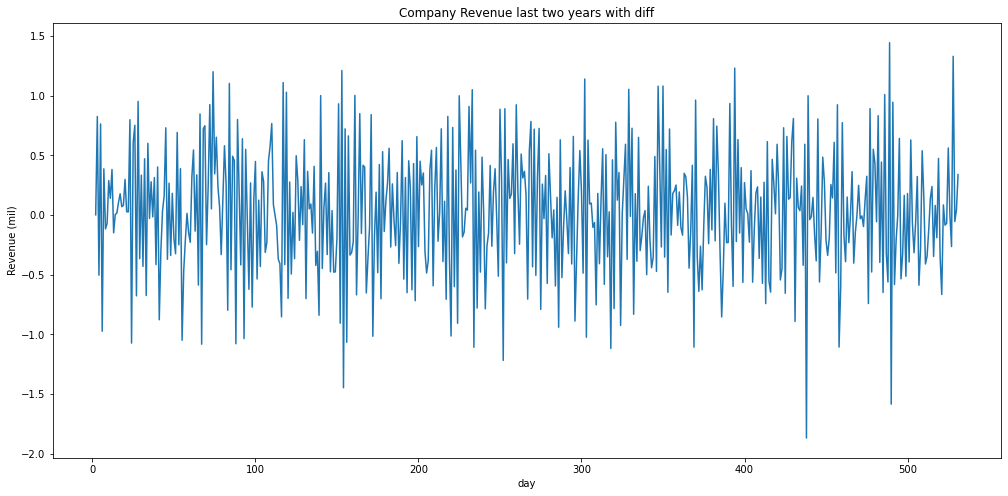

In [31]:
plt.figure(figsize=(17, 8))
plt.plot(df_trainstat)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [32]:
#AR model
model_train = ARMA(df_trainstat, order=(1,0))
results_train=model_train.fit()

In [33]:
print(results_train.summary())

                              ARMA Model Results                              
Dep. Variable:                Revenue   No. Observations:                  530
Model:                     ARMA(1, 0)   Log Likelihood                -349.586
Method:                       css-mle   S.D. of innovations              0.468
Date:                Mon, 30 May 2022   AIC                            705.172
Time:                        14:52:49   BIC                            717.991
Sample:                             0   HQIC                           710.190
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0244      0.014      1.763      0.078      -0.003       0.052
ar.L1.Revenue    -0.4686      0.038    -12.231      0.000      -0.544      -0.394
                                    Root

In [34]:
#AR MA model
model_train = ARMA(df_trainstat, order=(2,1))
results_train=model_train.fit()
print(results_train.summary())

                              ARMA Model Results                              
Dep. Variable:                Revenue   No. Observations:                  530
Model:                     ARMA(2, 1)   Log Likelihood                -349.378
Method:                       css-mle   S.D. of innovations              0.468
Date:                Mon, 30 May 2022   AIC                            708.755
Time:                        14:52:49   BIC                            730.120
Sample:                             0   HQIC                           717.118
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0244      0.014      1.784      0.074      -0.002       0.051
ar.L1.Revenue    -1.1069      0.554     -1.999      0.046      -2.192      -0.022
ar.L2.Revenue    -0.3162      0.252     

In [35]:
results_train = adfuller(df_trainstat)
print(results_train)

(-38.190106715897635, 0.0, 0, 529, {'1%': -3.442772146350605, '5%': -2.8670191055991836, '10%': -2.5696881663873414}, 688.1372245712575)


In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
forecast_train = results_train.get_prediction(start=-25)

AttributeError: 'tuple' object has no attribute 'get_prediction'

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(df_test)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [ ]:
df_teststat = df_test.diff().dropna()
df_teststat

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(df_teststat)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [ ]:
model_test = ARMA(df_teststat, order=(1,0))
results_test=model_test.fit()

In [ ]:
print(results_test.summary())

In [ ]:
results_test = adfuller(df_teststat)
print(results_test)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_3 = SARIMAX(df_stationary, order=(1,1,0))
results_3 = model_3.fit()

In [ ]:
forecast=results_3.get_prediction(start=25)
mean_forecast=forecast.predicted_mean

In [ ]:
confidence_intervals = forecast.conf_int()

plt.figure()
plt.plot('Day',
        mean_forecast.values,
        color='red',
        label='forecast')
plt.fill_between(Day,lower_limits, upper_limits, color='pink')
plt.show()

#creating ARMA data
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1, -0.5]
ma_coefs = [1, 0.2]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

In [ ]:
#fitting and ARMA model
model = ARMA(y, order=(1,0))
results_1 =model.fit()

In [ ]:
print(results_1.summary())

# D2

# D3

# D4

# D5

# E1

# E2

# E3

# F

# G

# H

# I